In [3]:
import pandas as pd

In [5]:
orders = pd.read_csv("C:/Users/belou/OneDrive/Рабочий стол/pet project/data/raw/orders.csv")
reviews = pd.read_csv("C:/Users/belou/OneDrive/Рабочий стол/pet project/data/raw/order_reviews.csv")
order_items = pd.read_csv("C:/Users/belou/OneDrive/Рабочий стол/pet project/data/raw/order_items.csv")
customers = pd.read_csv("C:/Users/belou/OneDrive/Рабочий стол/pet project/data/raw/customers.csv")
rfm = pd.read_csv("C:/Users/belou/OneDrive/Рабочий стол/pet project/data/processed/RFM.csv")

In [6]:
df = orders.merge(
    order_items, 
    on = 'order_id', 
    how = 'inner'
)
df = df.merge(
    reviews, 
    on = 'order_id',
    how = 'inner'
)
df = df.merge(
    customers[['customer_id','customer_unique_id', 'customer_state']], 
    on = 'customer_id', 
    how='inner'
)
df = df.merge(
    rfm[['customer_unique_id', 'segment']], 
    on = 'customer_unique_id', 
    how='inner'
)
df = df[df['order_status'] == 'delivered']
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_state,segment
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,SP,At risk
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,BA,New customer
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,GO,New customer
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,7c142cf63193a1473d2e66489a9ae977,RN,Others
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,72632f0f9dd73dfee390c9b22eb56dd6,SP,Others


In [7]:
order_items_agg = ( # считаем данные по каждому заказу: стоимость, количество товаров и стоимость доставки 
    order_items
    .groupby('order_id')
    .agg(
        order_price=('price', 'sum'), 
        items_count=('order_item_id', 'count'), 
        delivery_price=('freight_value','sum')
    )
    .reset_index()
)
df = df.merge(order_items_agg, on='order_id', how='left') # прикрепляем эти столбцы к основному дф 

In [8]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp']) #приводим всё к формату даты
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df = df[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date','review_score', 'customer_unique_id', 'segment',  'customer_state', 'order_price', 'items_count', 'delivery_price' ]]
df.columns

Index(['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_score', 'customer_unique_id',
       'segment', 'customer_state', 'order_price', 'items_count',
       'delivery_price'],
      dtype='object')

In [9]:
df['delivery_delay_days'] = (
    df['order_delivered_customer_date'] - df['order_estimated_delivery_date']
).dt.days # >0 - количество дней задержки 
df['is_late'] = df['delivery_delay_days'] > 0 # 1 - значит опоздали (тип тру или фолс)
df['delivery_time_days'] = (
    df['order_delivered_customer_date'] - df['order_purchase_timestamp']
).dt.days 
df['delivery_share'] = df['delivery_price'] / df['order_price'] #стоимость доставки относительно заказа

In [41]:
df['order_price_group'] = pd.cut( #делим заказы на группы 
    df['order_price'],
    bins=[0, 50, 150, 500, df['order_price'].max()],
    labels=['small', 'medium', 'large', 'extra_large'] #группа по стоимости заказа
)
df['items_count_group'] = pd.cut(
    df['items_count'], 
    bins = [0,1,2,5,df['items_count'].max()], 
    labels=['1 item', '2 items', '3–5 items', '6+ items'] #группа по количеству товаров в заказе 
)
df['delivery_share_group'] = pd.cut(
    df['delivery_share'],
    bins=[-0.01, 0, 0.15, 0.25, 0.5, 1, df['delivery_share'].max()],
    labels=['free','<15%', '15–25%', '25–50%', '50–100%', '100%+'] #группа по доли доставки заказа относительно его стоимости 
)

In [11]:
df['delivery_price_group'] = pd.cut(
    df['delivery_price'],
    bins=[-0.01, 0, 10, 30, 60, df['delivery_price'].max()], 
    labels=['Free', 'Low', 'Medium', 'High', 'Very high'] #группа по стоимости доставки заказа
)


In [12]:
rating_by_delay = (
    df
    .groupby('is_late')
    .agg(
        avg_rating=('review_score', 'mean'),
        orders=('order_id', 'count')
    )
    .reset_index()
)
rating_by_delay.head()

,is_late,avg_rating,orders
0,False,4.194476,103555
1,True,2.242287,7293


In [13]:
rating_by_price = (
    df.groupby('order_price_group', observed=True)
    .agg(
        avg_rating=('review_score', 'mean'), 
        orders=('order_id', 'count')
    )
    .reset_index()
)
rating_by_price.head()

,order_price_group,avg_rating,orders
0,small,4.181290,30636
1,medium,4.094001,49829
2,large,3.927242,25413
3,extra_large,3.784909,4970


In [14]:
rating_by_items_count = (
    df.groupby('items_count_group', observed=True)
    .agg(
        avg_rating=('review_score', 'mean'), 
        orders=('order_id', 'count')
    )
    .reset_index()
)
rating_by_items_count.head()

,items_count_group,avg_rating,orders
0,1 item,4.201017,87306
1,2 items,3.668278,14892
2,3–5 items,3.455925,6920
3,6+ items,3.118497,1730


In [15]:
rating_by_delivery_share = (
    df.groupby('delivery_share_group', observed=True)
    .agg(
        avg_rating=('review_score', 'mean'), 
        orders=('order_id', 'count')
    )
    .reset_index()
)
rating_by_delivery_share.head()

,delivery_share_group,avg_rating,orders
0,free,4.292105,380
1,<15%,4.133055,31596
2,15–25%,4.067614,27657
3,25–50%,4.028969,32897
4,50–100%,4.038363,14467


In [16]:
rating_by_delivery_price = (
    df.groupby('delivery_price_group', observed=True)
    .agg(
        avg_rating=('review_score', 'mean'), 
        orders=('order_id', 'count')
    )
    .reset_index()
)
rating_by_delivery_price.head()

,delivery_price_group,avg_rating,orders
0,Free,4.292105,380
1,Low,4.333519,10800
2,Medium,4.163348,72612
3,High,3.765152,19140
4,Very high,3.525139,7916


In [17]:
rating_by_rfm = (
    df.groupby('segment', observed=True)
    .agg(
        avg_rating=('review_score', 'mean'), 
        orders=('order_id', 'count')
    )
    .reset_index()
)
rating_by_rfm.head()

,segment,avg_rating,orders
0,At risk,4.122070,2261
1,Lost,4.151326,34343
2,Loyal,4.062658,4756
3,New customer,4.185163,34494
4,Others,3.854080,34519


In [21]:
rating_df = df[
    [
        'order_id',
        'review_score',
        'is_late',
        'delivery_delay_days',
        'delivery_time_days',
        'order_price',
        'order_price_group',
        'delivery_price',
        'delivery_price_group',
        'delivery_share',
        'delivery_share_group',
        'items_count',
        'items_count_group', 
        'segment'
    ]
].copy()

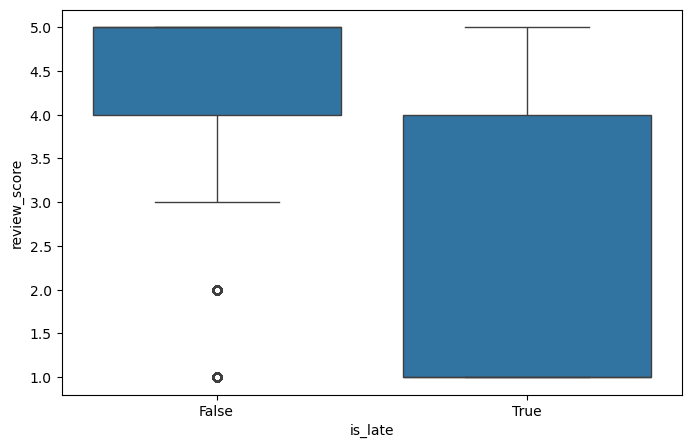

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='is_late',
    y='review_score'
)

plt.show()

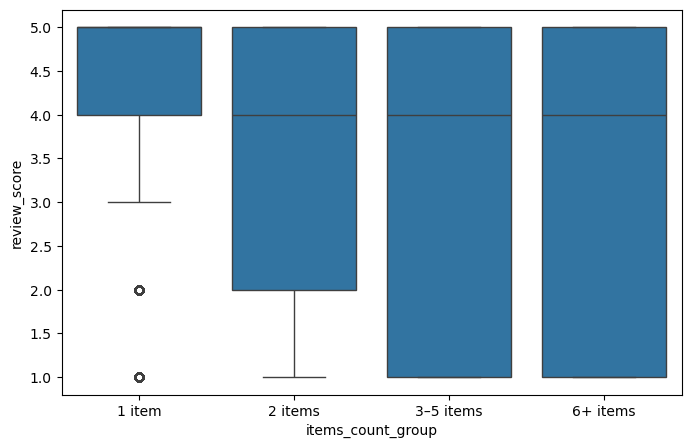

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='items_count_group',
    y='review_score'
)

plt.show()

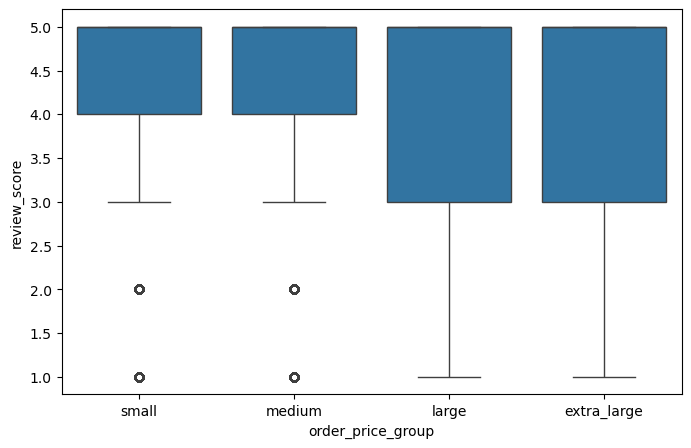

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='order_price_group',
    y='review_score'
)

plt.show()

In [27]:
df_corr = df[[
        'review_score',
        'delivery_delay_days',
        'delivery_time_days',
        'order_price',
        'delivery_price',
        'delivery_share',
        'items_count'
]]
corr_matrix = df_corr.corr(method='spearman', numeric_only='no_default') #порядковая шкала, ненормальное распределение
corr_with_rating = (
    corr_matrix['review_score']
    .sort_values(ascending=False)
)
corr_with_rating.reset_index()


,index,review_score
0,review_score,1.000000
1,delivery_share,-0.039329
2,order_price,-0.063053
3,delivery_price,-0.135471
4,delivery_delay_days,-0.153879
5,items_count,-0.162194
6,delivery_time_days,-0.222838


In [20]:
corr_matrix

,review_score,delivery_delay_days,delivery_time_days,order_price,delivery_price,delivery_share,items_count
review_score,1.000000,-0.153879,-0.222838,-0.063053,-0.135471,-0.039329,-0.162194
delivery_delay_days,-0.153879,1.000000,0.310127,-0.051390,-0.149392,-0.046569,-0.051510
delivery_time_days,-0.222838,0.310127,1.000000,0.098420,0.324557,0.114283,-0.030402
order_price,-0.063053,-0.051390,0.098420,1.000000,0.506083,-0.730260,0.281750
delivery_price,-0.135471,-0.149392,0.324557,0.506083,1.000000,0.143156,0.546376
delivery_share,-0.039329,-0.046569,0.114283,-0.730260,0.143156,1.000000,0.125216
items_count,-0.162194,-0.051510,-0.030402,0.281750,0.546376,0.125216,1.000000


<Axes: >

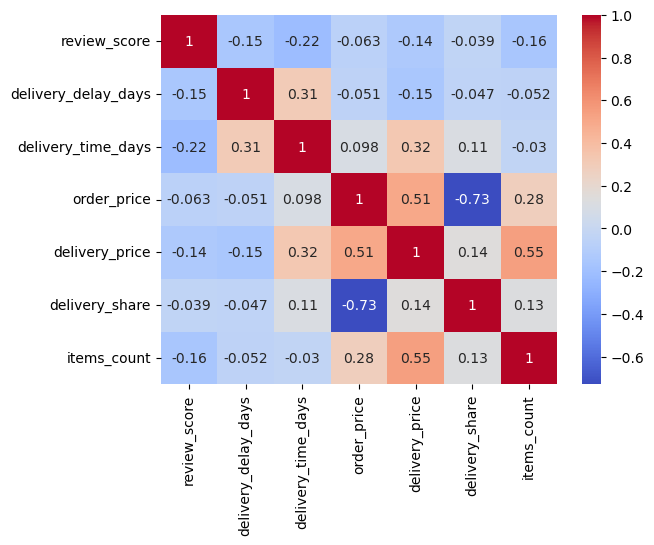

In [37]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')